# God Components in Apache Tika
How did big, bulky software components come into being? In this project, we explore the evolution of so-called _God Components_; a software anti-pattern where pieces of software with a large number of classes or lines of code get so large over time they become hard to maintain and reason about.

The codebase of choice is chosen to be [Apache Tika](https://tika.apache.org/), a content analysis toolkit built in Java. This Jupyter Notebook provides a structured analysis on data mined using Designite and using data from the Git repository. A report on the git contributers can be found [here](https://dunnkers.com/god-components/git-report) (made using gitinspector).

→ By [Jeroen Overschie](https://dunnkers.com/) and Konstantina Gkikopouli.

## Loading datasets
Import dependencies.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Load commit data.

In [2]:
all_commits = pd.read_csv('output/all_commits.csv', parse_dates=['datetime'], index_col='commit')
all_commits

,author,email,datetime,message,jira
commit,,,,,
5ad435d39e39558b98af3af5aca291eef22651f0,tallison,tallison@apache.org,2021-01-12 15:10:23-05:00,TIKA-3267 change boolean getXYZ to boolean isXYZ,TIKA-3267
e8b4305ce80df59e45352e73ceb972f4534c984c,tallison,tallison@apache.org,2021-01-11 17:05:01-05:00,TIKA-3269 update artifacts for 2.0.0,TIKA-3269
b0fb00ef6a11db121c56436b9542a4cf248fef8b,Tim Allison,tallison@apache.org,2021-01-11 15:48:10-05:00,TIKA-3266 (#396),TIKA-3266
566c5962101db0be4ff56c6ff3740c05701a3c0e,THausherr,tilman@snafu.de,2021-01-10 14:21:20+01:00,TIKA-3244: update zstd,TIKA-3244
d732cc17ea555572d1b1fe9e041931fb36567cdf,tallison,tallison@apache.org,2021-01-07 16:45:31-05:00,TIKA-3268 -- throw exception if excluded parse...,TIKA-3268
...,...,...,...,...,...
c5417bed9a7f84acb913f0197e241ecb0d1205b4,Jukka Zitting,jukka@apache.org,2007-03-31 12:40:53+00:00,TIKA-2: Basic web site based on Maven 2.,TIKA-2
6e750bb72e8be60c27bcf6bf6dd3a05742c812fc,Jukka Zitting,jukka@apache.org,2007-03-31 10:35:09+00:00,TIKA-4: Ignore Eclipse project files.,TIKA-4
3794e9a8a99172f9666befbba686af29276200ea,Jukka Zitting,jukka@apache.org,2007-03-31 10:31:15+00:00,TIKA-4: Basic Maven 2 POM and source tree for ...,TIKA-4


Note that some commit authors are actually the same person, but under different aliases. Let's fix this using a simple mapping.

In [3]:
len(all_commits['author'].unique())

127

In [4]:
authormap = pd.read_csv('output/authormap.csv')
all_commits['author'] = all_commits['author']\
    .replace(authormap['from'].values, authormap['to'].values)
len(all_commits['author'].unique())

111

Dispose some columns we don't need.

In [5]:
all_commits = all_commits[['author', 'datetime', 'jira']]

Make sure the date rows are indeed parsed as a _datetime_.

In [6]:
all_commits['datetime'].values[0]

datetime.datetime(2021, 1, 12, 15, 10, 23, tzinfo=tzoffset(None, -18000))

Load the aggregated report file, `all_reports.csv`. Contains Designite report data for every single Tika commit.

In [7]:
all_reports = pd.read_csv('output/all_reports.csv', dtype={'package': 'category'},
    index_col=['package', 'commit'])
all_reports = all_reports.rename(columns={'metric': '# classes'}) # rename col
all_reports

,,repo,smell,cause,# classes
package,commit,,,,
org.apache.tika.example,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,God Component,MANY_CLASSES,49
org.apache.tika.batch,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,God Component,MANY_CLASSES,31
org.apache.tika.detect,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,God Component,MANY_CLASSES,31
org.apache.tika.parser,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,God Component,MANY_CLASSES,37
org.apache.tika.mime,49bb4691393c016d8d65e6b11febca9e56feedef,tika-cpu_21,God Component,MANY_CLASSES,31
...,...,...,...,...,...
org.apache.tika.sax,77d57d5506cfacf4e75d09e214643deda5a52047,tika-cpu_17,God Component,MANY_CLASSES,35
org.apache.tika.parser.txt,77d57d5506cfacf4e75d09e214643deda5a52047,tika-cpu_17,God Component,MANY_CLASSES,74
org.apache.tika.sax,edb6775bf356eaaf656730589cc3340a15b602ea,tika-cpu_21,God Component,MANY_CLASSES,33


Dispose some columns.

In [8]:
all_reports = all_reports[['# classes']]

Add commits to report data, combining them into one big dataset, `gcdata`.

In [9]:
gcdata = all_reports.join(all_commits)

## God component lifetime
General statistics on lifetime.

In [10]:
# Compute date data
dt = gcdata.groupby('package')['datetime']
normalize_date = lambda date: pd.to_datetime(date, utc=True)\
                    .dt.tz_convert('Europe/Amsterdam')
dtmin = normalize_date(dt.min())
dtmax = normalize_date(dt.max())
became_gc   = dtmin.dt.strftime('%Y-%m-%d')
last_gc     = dtmax.dt.strftime('%Y-%m-%d')
gc_commits  = dt.count()
gc_days     = (dtmax - dtmin).dt.days

# Compute author data
authors = gcdata.groupby('package')['author'].unique()
n_authors = authors.transform(lambda x: len(x))

# DataFrame
stats = pd.DataFrame([became_gc, last_gc, gc_commits, gc_days, n_authors],
        ['Became GC at', 'Last seen as GC', '# GC commits', '# GC days', '# authors'])\
        .transpose().reset_index()
stats

,package,Became GC at,Last seen as GC,# GC commits,# GC days,# authors
0,org.apache.tika.batch,2015-06-28,2020-12-14,2352,1996,100
1,org.apache.tika.detect,2017-01-19,2020-12-14,1579,1424,71
2,org.apache.tika.example,2015-05-04,2020-12-14,2433,2050,101
3,org.apache.tika.fork,2018-05-31,2020-12-14,738,927,45
4,org.apache.tika.metadata,2016-09-26,2020-12-14,1743,1539,77
5,org.apache.tika.mime,2015-05-02,2020-12-14,2443,2053,101
6,org.apache.tika.parser,2015-02-21,2020-12-14,2429,2123,102
7,org.apache.tika.parser.microsoft,2011-11-25,2020-12-14,3052,3306,105
8,org.apache.tika.parser.microsoft.chm,2020-08-21,2020-12-14,155,114,11
9,org.apache.tika.parser.microsoft.onenote,2019-12-16,2020-12-14,305,363,22


In [11]:
'Average GC lifetime: ' + str(gc_days.mean() / 365) + ' years'

'Average GC lifetime: 4.986666666666667 years'

Average over the above stats

In [12]:
stats.agg({
    '# GC commits': 'mean',
    '# GC days': 'mean',
    '# authors': 'mean'
})

# GC commits    1871.800000
# GC days       1820.133333
# authors         70.733333
dtype: float64

Total amount of God Components

Text(0, 0.5, '# god components')

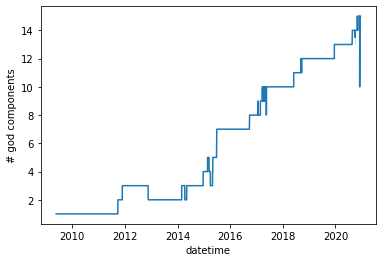

In [13]:
total_gcs = gcdata.groupby(['commit', 'datetime']).count().reset_index()
sns.lineplot(data=total_gcs, x='datetime', y='# classes')
plt.ylabel('# god components')

Amount of classes per God Component

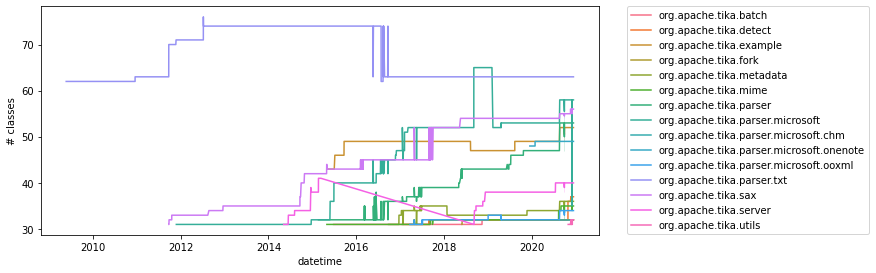

In [14]:
fig, ax = plt.subplots(figsize=(10, 4.2))
g = sns.lineplot(data=gcdata.sort_values('package'),
    x='datetime', y='# classes', hue='package', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Computing the `# classes` chronological difference (delta)

In [15]:
gcdelta = all_reports.groupby('package')\
    .apply(lambda df: df.merge(all_commits, on='commit', how='right'))
gcdelta['# classes diff'] = gcdelta['# classes'].diff(periods=-1).fillna(0).astype(int)
gcdelta['is gc'] = gcdelta['# classes'] > 0
gcdelta['is gc diff'] = gcdelta['is gc'].diff(periods=-1).fillna(False)
gcdelta['anchor'] = 0
gcdelta['# classes added']   = gcdelta[['anchor', '# classes diff']].max(axis=1)
gcdelta['# classes removed'] = gcdelta[['anchor', '# classes diff']].min(axis=1)
gcdelta = gcdelta.drop(columns=['anchor'])
print('gcdelta has {} total rows'.format(len(gcdelta)))
gcdelta[gcdelta['# classes diff'] > 0]

gcdelta has 74760 total rows


# classes  \
package                commit                                                
org.apache.tika.batch  30c3d8104a51f015416382995435a4785059f07c       32.0   
org.apache.tika.detect 8b82b4c942c82f9cc2eb393e669227606b5f15fc       37.0   
                       a43784b19f6b0955478dded71521b0491d21c90b       36.0   
                       ee8caf69456bd52d278283792dc1b9c56477c243       36.0   
                       70ca280f11fe4127df290b8027c6bc1d5180271f       32.0   
...                                                                    ...   
org.apache.tika.server f776fc07aecdf4e97343cba7ee7d35d1cd9743df       39.0   
                       57db5ef21c95f49aa19b9da69a69d27a2a1da5ad       38.0   
                       95051f2a352f3e7ee83acf203d75b803a26c3f4f       34.0   
                       583af266a28f6494c29fcd62fa78fcc32199cc2e       33.0   
org.apache.tika.utils  8b82b4c942c82f9cc2eb393e669227606b5f15fc       32.0   

                                                                           author  \
package                commit                                                       
org.apache.tika.batch  30c3d8104a51f015416382995435a4785059f07c       Tim Allison   
org.apache.tika.detect 8b82b4c942c82f9cc2eb393e669227606b5f15fc       Tim Allison   
                       a43784b19f6b0955478dded71521b0491d21c90b       Tim Allison   
                       ee8caf69456bd52d278283792dc1b9c56477c243       Tim Allison   
                       70ca280f11fe4127df290b8027c6bc1d5180271f            Nassif   
...                                                                           ...   
org.apache.tika.server f776fc07aecdf4e97343cba7ee7d35d1cd9743df       Tim Allison   
                       57db5ef21c95f49aa19b9da69a69d27a2a1da5ad       Tim Allison   
                       95051f2a352f3e7ee83acf203d75b803a26c3f4f  Sergey Beryozkin   
                       583af266a28f6494c29fcd62fa78fcc32199cc2e    Chris Mattmann   
org.apache.tika.utils  8b82b4c942c82f9cc2eb393e669227606b5f15fc       Tim Allison   

                                                                                  datetime  \
package                commit                                                                
org.apache.tika.batch  30c3d8104a51f015416382995435a4785059f07c  2018-11-13 14:08:26-05:00   
org.apache.tika.detect 8b82b4c942c82f9cc2eb393e669227606b5f15fc  2020-12-04 13:16:28-05:00   
                       a43784b19f6b0955478dded71521b0491d21c90b  2020-12-02 11:58:44-05:00   
                       ee8caf69456bd52d278283792dc1b9c56477c243  2020-10-29 10:57:03-04:00   
                       70ca280f11fe4127df290b8027c6bc1d5180271f  2017-09-08 12:36:48-03:00   
...                                                                                    ...   
org.apache.tika.server f776fc07aecdf4e97343cba7ee7d35d1cd9743df  2014-12-19 03:12:38+00:00   
                       57db5ef21c95f49aa19b9da69a69d27a2a1da5ad  2014-12-18 19:50:52+00:00   
                       95051f2a352f3e7ee83acf203d75b803a26c3f4f  2014-08-06 08:06:52+00:00   
                       583af266a28f6494c29fcd62fa78fcc32199cc2e  2014-06-14 18:52:44+00:00   
org.apache.tika.utils  8b82b4c942c82f9cc2eb393e669227606b5f15fc  2020-12-04 13:16:28-05:00   

                                                                      jira  \
package                commit                                                
org.apache.tika.batch  30c3d8104a51f015416382995435a4785059f07c  TIKA-2778   
org.apache.tika.detect 8b82b4c942c82f9cc2eb393e669227606b5f15fc  TIKA-3218   
                       a43784b19f6b0955478dded71521b0491d21c90b  TIKA-3241   
                       ee8caf69456bd52d278283792dc1b9c56477c243  TIKA-3215   
                       70ca280f11fe4127df290b8027c6bc1d5180271f  TIKA-2460   
...                                                                    ...   
org.apache.tika.server f776fc07aecdf4e97343cba7ee7d35d1cd9743df  TIKA-1497   
                   

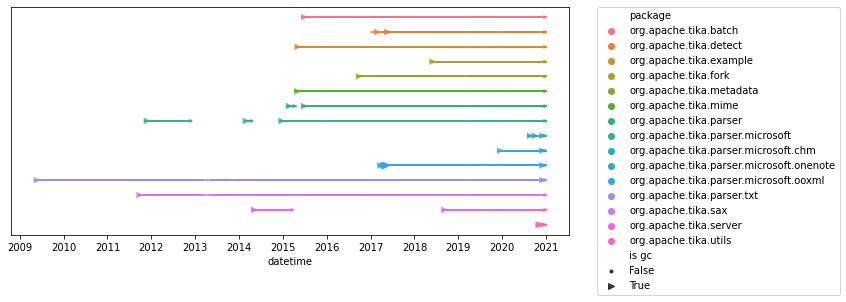

In [16]:
import matplotlib.dates as md
fig, ax = plt.subplots(figsize=(10, 4.2))
# scatter `_` symbols such that it looks like a continuous line.
sns.scatterplot(data=gcdelta[gcdelta['is gc']],\
    x='datetime', y='package', hue='package',\
    ax=ax, legend=False, marker='_', edgecolor=None)
# start- and ending markers for GC lifetime.
sns.scatterplot(data=gcdelta[gcdelta['is gc diff']],\
    x='datetime', y='package', hue='package',\
    ax=ax, edgecolor=None, markers={False: '.', True: '>'},\
    style='is gc', alpha=0.75)
ax.xaxis.set_major_locator(md.YearLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
ax.axes.yaxis.set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Save a small version of `is gc` metric the `# classes` dataframe only where abstract difference > 3

In [17]:
gcdelta[gcdelta['# classes diff'].abs() > 3]\
    .sort_values(['package', 'datetime'], ascending=True)\
    .to_csv('output/diffs_nclasses.csv',  
        columns=['# classes', '# classes diff', '# classes added', '# classes removed', 'author', 'datetime', 'jira'],
        float_format='%.f')
gcdelta[gcdelta['is gc diff']]\
    .sort_values(['package', 'datetime'], ascending=True)\
    .to_csv('output/diffs_isgc.csv',  
        columns=['is gc', '# classes', '# classes diff', 'author', 'datetime', 'jira'],
        float_format='%.f')

## God Component growth in terms of Lines Of Code (LOC)
Load up data on Lines Of Code for every God Component at the state of every commit.

In [18]:
all_locs = pd.read_csv('output/all_locs.csv', index_col=['package', 'commit'])
all_locs

additions  \
package               commit                                                
org.apache.tika.batch fe4cd58cced0e15f1848afbc2518ab4a66e6867f       6638   
                      dbc5eb76b7a21587eba83724e36bff1cb29e72c6        251   
                      8054dddc156444a0e67a66fcd2dbc9b4bb5db4b7         13   
                      4ae33b70378e0ee66b7d9c95d6fd7d51b10cc658         28   
                      6a013f550bf7e8cfbed4652ec3785e1627d0f7ea        353   
...                                                                   ...   
org.apache.tika.utils 813a6eb69853d87ae54fc4bf6183267bb480322d          2   
                      7fd2825613bce5fd741a0126de8d812a316389ba          2   
                      dd85c73094dc87f6f6e208278325be810761f490          1   
                      326b7d7abda238ccc181fc2acaf2271e08fe9c1b          1   
                      7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c          1   

                                                                deletions  \
package               commit                                                
org.apache.tika.batch fe4cd58cced0e15f1848afbc2518ab4a66e6867f          0   
                      dbc5eb76b7a21587eba83724e36bff1cb29e72c6        227   
                      8054dddc156444a0e67a66fcd2dbc9b4bb5db4b7         14   
                      4ae33b70378e0ee66b7d9c95d6fd7d51b10cc658         26   
                      6a013f550bf7e8cfbed4652ec3785e1627d0f7ea        334   
...                                                                   ...   
org.apache.tika.utils 813a6eb69853d87ae54fc4bf6183267bb480322d          2   
                      7fd2825613bce5fd741a0126de8d812a316389ba          2   
                      dd85c73094dc87f6f6e208278325be810761f490          1   
                      326b7d7abda238ccc181fc2acaf2271e08fe9c1b          1   
                      7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c          1   

                                                                 LOC  change  
package               commit                                                  
org.apache.tika.batch fe4cd58cced0e15f1848afbc2518ab4a66e6867f  6638    6638  
                      dbc5eb76b7a21587eba83724e36bff1cb29e72c6  6662      24  
                      8054dddc156444a0e67a66fcd2dbc9b4bb5db4b7  6661      -1  
                      4ae33b70378e0ee66b7d9c95d6fd7d51b10cc658  6663       2  
                      6a013f550bf7e8cfbed4652ec3785e1627d0f7ea  6682      19  
...                                                              ...     ...  
org.apache.tika.utils 813a6eb69853d87ae54fc4bf6183267bb480322d  4969       0  
                      7fd2825613bce5fd741a0126de8d812a316389ba  4969       0  
                      dd85c73094dc87f6f6e208278325be810761f490  4969       0  
                      326b7d7abda238ccc181fc2acaf2271e08fe9c1b  4969       0  
                      7f65d61b4fe1f4c1d4929bbe1c456c68afd44b6c  4969       0  

[4505 rows x 4 columns]

Add commit datetime.

In [19]:
locdata = all_locs.join(all_commits)

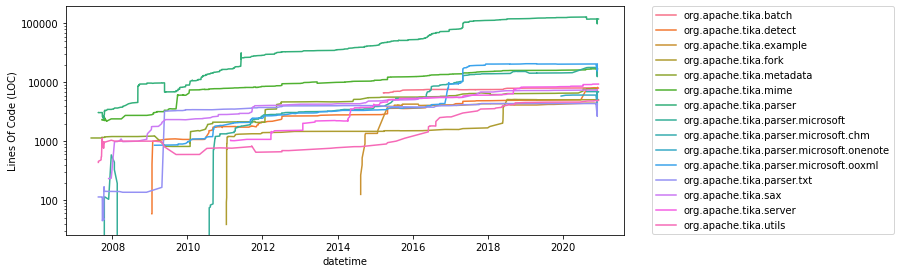

In [20]:
fig, ax = plt.subplots(figsize=(10, 4.2))
g = sns.lineplot(data=locdata, x='datetime', y='LOC', hue='package', ax=ax)
g.set(yscale='log')
g.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ylabel('Lines Of Code (LOC)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Investigating what developers contribute to GC buildup
How many developers contributed to God Components? We aim to answer the question in terms of both God Component (1) buildup and (2) refactoring. We do this, by considering the `# classes added` and `# classes removed` for each developer.

In [21]:
gcdelta['# classes changed'] = gcdelta['# classes diff'].abs()
df = gcdelta[gcdelta['# classes changed'] > 0]\
    .groupby('author')\
    .agg('sum')[['# classes changed', '# classes added', '# classes removed']]
totalclasses = df['# classes changed'].sum()
df['% contributed'] = df['# classes changed'] / totalclasses * 100
df.sort_values('% contributed', ascending=False)

,# classes changed,# classes added,# classes removed,% contributed
author,,,,
Tim Allison,314,191,-123,46.587537
Nick Burch,85,42,-43,12.611276
Thamme Gowda,60,54,-6,8.902077
Lewis John McGibbney,49,23,-26,7.270030
Giuseppe Totaro,30,28,-2,4.451039
Chris Mattmann,23,8,-15,3.412463
amensiko,18,11,-7,2.670623
ThejanW,11,0,-11,1.632047
Cameron Rollheiser,11,0,-11,1.632047


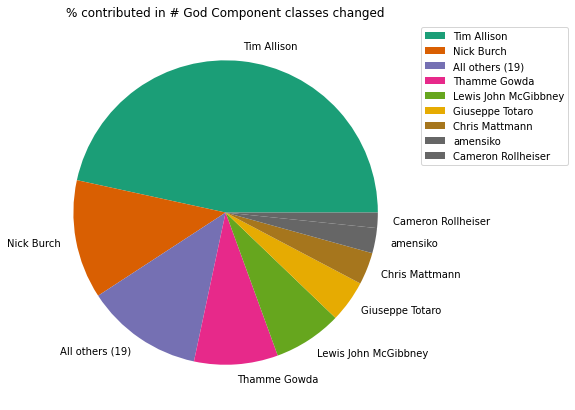

In [22]:
topn = df.nlargest(8, '% contributed')

# Compute a row that sums 'All others' except for the top n authors.
allothers = df.nsmallest(len(df) - len(topn), '% contributed')
lastn = allothers.sum().to_dict()
lastn['author'] = 'All others ({})'.format(len(allothers.index.unique()))
least = pd.DataFrame([lastn]).set_index('author')
classescontrib = pd.concat([topn, least])\
    .sort_values('% contributed', ascending=False)
# Pie chart
g = classescontrib.plot.pie(y='% contributed', figsize=(7, 7), colormap='Dark2')
plt.ylabel('')
plt.title('% contributed in # God Component classes changed')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Text(0.5, 1.0, 'Top contributers versus # classes added / removed')

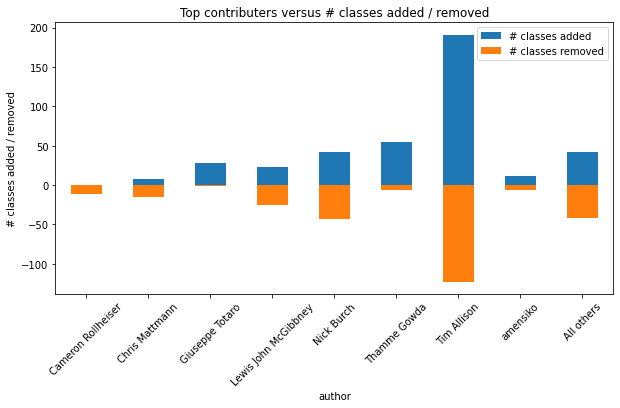

In [23]:
topnames = topn.index.unique()
# Top contributers sum of # classes changed
topcontr = gcdelta['author'].isin(topnames)
nettotop = gcdelta[topcontr].reset_index()\
    .groupby('author').sum()[['# classes added', '# classes removed']]
# All others sum of # classes changed
others = ~gcdelta['author'].isin(topnames)
lastn = gcdelta[others].reset_index()\
    .groupby('author').sum()[['# classes added', '# classes removed']]\
    .sum().to_dict()
lastn['author'] = 'All others'
least = pd.DataFrame([lastn]).set_index('author')

pd.concat([nettotop, least])\
    .plot.bar(stacked=True, figsize=(10, 5))
plt.xticks(rotation=45)
plt.ylabel('# classes added / removed')
plt.title('Top contributers versus # classes added / removed')

Also, show that there are not a lot of developers working on the entire project at all. Developers versus LOC's added/removed:

In [24]:
df = locdata.groupby('author').agg('sum').drop(columns=['LOC'])
totalchange = df['change'].sum()
df['% contributed'] = df['change'] / totalchange * 100
df.sort_values('% contributed', ascending=False)

,additions,deletions,change,% contributed
author,,,,
Tim Allison,212484,143092,69392,28.026980
Chris Mattmann,47236,13721,33515,13.536492
Jukka Zitting,77686,47854,29832,12.048952
Nick Burch,42384,12628,29756,12.018256
Madhav Sharan,27264,3846,23418,9.458379
...,...,...,...,...
Hasan Kara,0,1,-1,-0.000404
Ioannis Kakavas,5,6,-1,-0.000404
Javen O'Neal,26,36,-10,-0.004039


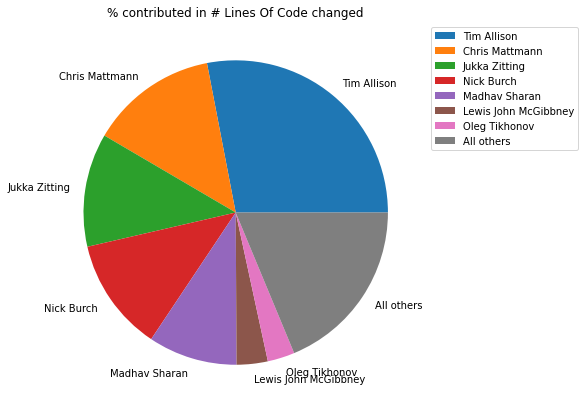

In [25]:
topn = df.nlargest(7, '% contributed')

# Compute a row that sums 'All others' except for the top n authors.
lastn = df.nsmallest(len(df) - len(topn), '% contributed').sum().to_dict()
lastn['author'] = 'All others'
least = pd.DataFrame([lastn]).set_index('author')
pd.concat([topn, least])\
    .plot.pie(y='% contributed', figsize=(7, 7))
plt.ylabel('')
plt.title('% contributed in # Lines Of Code changed')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

## Jira Issues analysis
Add the Tika Jira issue tracker information as a data source.

In [26]:
all_issues = pd.read_csv('output/all_issues.csv', dtype={'issuetype': 'category'},
    index_col='jira')
all_issues = all_issues.drop(columns=['id', 'self', 'reporter', 'updated'])
all_issues

,resolution,priority,assignee,status,creator,issuetype,resolutiondate,created,components
jira,,,,,,,,,
TIKA-3256,Fixed,Minor,tilman,Resolved,tilman,Task,2020-12-27T13:08:45.000+0000,2020-12-27T13:07:15.000+0000,general
TIKA-3255,NaN,Major,NaN,Open,peterkronenberg,Bug,NaN,2020-12-22T17:04:55.000+0000,NaN
TIKA-3254,NaN,Major,NaN,Open,sathia,Bug,NaN,2020-12-22T13:49:17.000+0000,NaN
TIKA-3253,NaN,Minor,NaN,Open,tilman,Improvement,NaN,2020-12-17T08:57:18.000+0000,tika-eval
TIKA-3252,NaN,Trivial,NaN,Open,tilman,Bug,NaN,2020-12-17T08:38:45.000+0000,documentation
...,...,...,...,...,...,...,...,...,...
TIKA-5,Fixed,Major,chrismattmann,Closed,chrismattmann,New Feature,2007-06-08T22:55:39.000+0000,2007-05-31T21:49:14.000+0000,general
TIKA-4,Fixed,Major,jukkaz,Closed,jukkaz,Task,2007-03-31T13:48:32.000+0000,2007-03-31T06:58:59.000+0000,NaN
TIKA-3,Fixed,Major,jukkaz,Closed,jukkaz,Task,2007-03-31T09:33:24.000+0000,2007-03-31T06:57:02.000+0000,NaN


Keep only issue key and issue type columns.

In [27]:
all_issues = all_issues[['issuetype']]

Generally, how many and what types of issues are in Apache Tika's Jira issue tracker?

In [28]:
print(all_issues.value_counts().sum(), 'issues total.')
all_issues.value_counts()

3248 issues total.


issuetype  
Bug            1592
Improvement    1056
Task            260
New Feature     219
Sub-task         65
Wish             46
Test             10
dtype: int64

... of which these amounts are involved in God Component commits:

In [29]:
issuedata = gcdata.reset_index().merge(all_issues, on='jira') # combine with GC data
issuetypes = issuedata[['jira', 'issuetype']].drop_duplicates()[['issuetype']]
print(issuetypes.value_counts().sum(), 'issues total related to GC commits.')
issuetypes.value_counts()

1694 issues total related to GC commits.


issuetype  
Bug            708
Improvement    643
Task           178
New Feature    107
Sub-task        37
Wish            17
Test             4
dtype: int64

... which is this percentage:

In [30]:
issuetypes.value_counts() / all_issues.value_counts()

issuetype  
Bug            0.444724
Improvement    0.608902
Task           0.684615
New Feature    0.488584
Sub-task       0.569231
Wish           0.369565
Test           0.400000
dtype: float64

We can also check what issue types are represented most in the God Component commits:

In [31]:
issuetypes.value_counts(normalize=True)

issuetype  
Bug            0.417946
Improvement    0.379575
Task           0.105077
New Feature    0.063164
Sub-task       0.021842
Wish           0.010035
Test           0.002361
dtype: float64

Build a pivot table and show heatmap.

In [32]:
issuedata = gcdata.reset_index().merge(all_issues, on='jira') # combine with GC data
typecounts = issuedata.set_index(['package', 'issuetype']).index.value_counts()
typecountdf = pd.DataFrame({ 'count': typecounts.values }, 
    index=pd.MultiIndex.from_tuples(typecounts.keys(), names=['package', 'issuetype']))\
        .reset_index()
typecountdf

,package,issuetype,count
0,org.apache.tika.parser.txt,Improvement,1252
1,org.apache.tika.parser.txt,Bug,1164
2,org.apache.tika.sax,Improvement,961
3,org.apache.tika.sax,Bug,906
4,org.apache.tika.parser.microsoft,Improvement,721
...,...,...,...
85,org.apache.tika.server,Test,3
86,org.apache.tika.parser.microsoft.chm,New Feature,2
87,org.apache.tika.parser,Test,2
88,org.apache.tika.fork,Sub-task,1


Text(0.5, 1.0, 'Amount of commits related to issue types per GC')

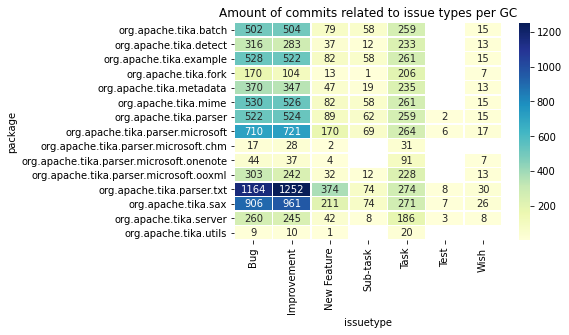

In [33]:
rectangular = typecountdf.pivot(index='package', columns='issuetype', values='count')
f, ax = plt.subplots()
plt.yticks(rotation=0)
plt.xticks(rotation=45)
g = sns.heatmap(rectangular,\
    annot=True, fmt='.0f', linewidths=.5,\
    cmap="YlGnBu", yticklabels=True, ax=ax)
plt.title('Amount of commits related to issue types per GC')

### Issue types that contribute to GC buildup
This time around, only include those commits that actually 'build up' or 'decrease' the size of a God Component; i.e. those commits that actually: **add** or **remove** classes to a GC.

In [34]:
gd = gcdelta.reset_index().merge(all_issues, on='jira')
netto = gd.groupby('issuetype').sum()[['# classes added', '# classes removed']]
netto

,# classes added,# classes removed
issuetype,,
Bug,48,-51
Improvement,143,-102
New Feature,24,-16
Sub-task,4,-4
Task,56,-39
Test,0,0
Wish,0,0


Text(0, 0.5, '# classes')

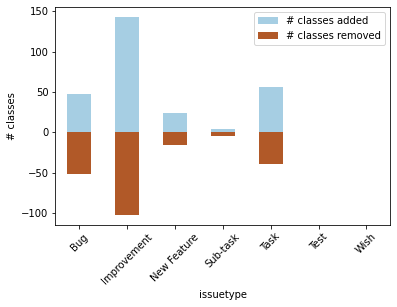

In [35]:
netto.plot.bar(stacked=True, colormap='Paired')
plt.xticks(rotation=45)
plt.ylabel('# classes')